## EDA on image data before modeling building
* The data comes pre-split into training and test images.  
* Both dataset contain two files, one with the images, and another with the image labels.  

In [1]:
# Import modules

from __future__ import division

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import functools
from tqdm import tqdm, tqdm_notebook
import keras
import keras.backend as K
from IPython.display import SVG
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
# Set pandas preferences
pd.options.display.max_columns=500
pd.options.display.max_colwidth=500

In [3]:
# Set the plot style
plt.style.use('ggplot')

# Load data
* We need both training and test sets

In [4]:
train_path = 'Volcanoes_train/'
test_path = 'Volcanoes_test/'

In [5]:
train_images = pd.read_csv(train_path + 'train_images.csv', header=None)

In [6]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,115,96,89,102,109,108,102,104,95,91,100,99,97,100,107,109,98,98,94,98,102,87,82,94,105,93,102,107,98,105,111,108,94,95,97,108,96,92,89,95,101,94,56,61,90,101,92,101,110,102,104,116,112,95,95,90,110,109,90,97,101,101,92,79,77,96,89,91,97,101,98,89,95,107,113,99,78,93,102,99,98,105,103,107,112,94,79,84,103,104,103,103,114,125,111,95,99,87,90,93,77,75,84,104,100,90,99,93,79,101,99,86,76,80,87,98,108,95,72,91,98,82,97,104,102,99,91,86,101,99,97,91,95,93,103,104,104,96,106,112,108,106,105,107,112,109,100,96,90,99,109,102,87,96,99,108,103,84,98,96,79,87,98,100,103,96,102,102,98,100,112,100,91,100,109,95,105,103,116,124,116,105,97,109,123,115,84,104,102,100,87,95,92,87,100,86,80,90,92,95,103,101,104,104,109,118,108,91,79,84,95,94,89,102,106,99,92,94,106,101,89,90,70,78,103,95,89,80,82,86,97,95,105,112,97,95,100,94,103,92,...,99,96,110,115,102,92,83,73,94,112,109,92,100,96,96,84,111,116,109,87,98,111,103,98,111,112,110,94,92,90,81,94,91,66,88,94,91,86,87,95,99,101,92,103,101,102,96,91,92,90,108,108,104,116,106,95,104,110,106,105,106,105,111,107,101,94,106,109,102,103,96,93,99,93,76,94,101,95,84,98,97,70,79,79,89,99,101,95,100,89,88,88,96,89,92,109,113,98,96,97,101,104,106,95,80,89,93,90,83,92,93,101,115,124,119,108,84,91,95,104,108,100,103,90,98,101,103,116,125,117,101,96,88,99,102,94,99,102,82,91,98,106,110,101,94,92,91,76,90,98,81,91,89,98,102,107,103,99,98,109,129,112,100,101,103,103,103,107,110,110,116,125,123,111,83,88,98,93,76,96,104,93,106,108,104,99,84,80,77,95,93,76,95,111,99,94,95,97,100,101,102,110,101,104,101,113,108,77,82,97,101,95,105,103

In [7]:
train_labels = pd.read_csv(train_path + 'train_labels.csv')

In [8]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [9]:
test_images = pd.read_csv(test_path + 'test_images.csv', header=None)

In [10]:
test_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,118,115,111,121,114,94,98,100,99,108,112,107,100,88,98,104,107,105,96,94,83,94,97,95,90,96,100,110,109,99,96,107,103,104,106,100,94,97,105,105,97,104,120,122,120,109,103,110,119,113,93,92,104,108,106,113,114,101,97,104,106,114,112,106,98,97,86,89,99,104,91,89,100,109,106,96,108,111,107,117,130,126,111,106,116,124,130,126,113,109,110,113,106,95,104,107,115,108,96,104,101,106,108,111,105,99,103,96,93,97,96,99,107,117,105,84,107,110,98,106,110,98,95,103,113,123,120,111,104,104,99,104,108,99,96,103,96,92,94,107,113,111,106,112,113,108,103,98,97,101,101,105,106,113,118,112,114,120,127,122,110,104,101,97,99,111,117,112,103,108,110,106,109,108,110,116,105,97,89,90,98,106,101,100,104,107,107,100,103,109,118,113,104,107,111,128,134,127,114,116,120,121,110,108,101,96,104,98,89,93,112,111,115,110,99,98,100,103,112,112,101,105,110,104,82,94,111,112,103,98,106,101,94,98,104,110,112,108,105,101,...,101,92,105,107,108,100,101,107,86,94,98,101,94,105,116,108,98,107,106,95,104,115,112,96,89,103,103,105,116,117,99,106,105,104,96,93,105,105,107,109,104,86,98,107,112,112,101,96,111,108,97,97,106,103,99,100,109,105,96,110,116,104,95,101,103,108,104,107,111,106,99,107,117,122,120,108,109,106,99,99,108,108,98,91,97,104,100,97,107,114,117,109,108,110,108,107,113,115,107,105,108,94,101,105,107,106,109,114,116,115,106,96,98,93,98,103,100,97,97,103,100,100,106,117,124,113,92,95,107,111,109,110,110,94,82,95,97,111,126,133,99,111,117,115,110,106,101,104,109,114,115,110,114,107,97,101,84,93,110,119,121,111,105,104,103,104,109,109,98,97,111,105,106,112,100,103,99,100,

In [11]:
test_labels = pd.read_csv(test_path + 'test_labels.csv')

In [12]:
test_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,1,1.0,17.00,1.0
3,0,NaN,NaN,NaN
4,1,3.0,15.13,1.0


In [13]:
train_images.shape

(7000, 12100)

In [14]:
train_labels.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,7000.000000,1000.000000,1000.000000,1000.000000
mean,0.142857,2.965000,16.257650,1.236000
std,0.349952,0.984248,11.632887,0.553724
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,5.830000,1.000000
50%,0.000000,3.000000,14.870000,1.000000
75%,0.000000,4.000000,23.555001,1.000000
max,1.000000,4.000000,87.660000,5.000000


In [15]:
train_labels['Volcano?'].value_counts()

0    6000
1    1000
Name: Volcano?, dtype: int64

In [16]:
# So there are 6000 examples with no volcanos and 1000 with volcanos.  The images with volcanos could contain multiple volcanoes:
# 1 is one volcano, 2 is 2 volcanoes, etc...
train_labels['Number Volcanoes'].value_counts()

1.0    814
2.0    147
3.0     30
4.0      7
5.0      2
Name: Number Volcanoes, dtype: int64

In [17]:
# There is also a column describing the certainty of the label:
# 1 is definitely a volcano, 2 is probably, 3 is possibly, 4 is only a pit is visible.
train_labels['Type'].value_counts()

4.0    362
3.0    346
2.0    187
1.0    105
Name: Type, dtype: int64

In [18]:
# So the join here is presumably by index.  Volcano? = 0 means no volcano, so the rest of the columns are NaN.  
# Let's look at an example image to see how it should be understood.
example_image = train_images.iloc[0].values

In [19]:
# So this is now an array of shape
example_image.shape

(12100,)

In [20]:
# The images are meant to be 110x110 pixels with values from 0 to 255.
example_image = np.reshape(example_image, (110, 110))

In [21]:
example_image

array([[ 95, 101,  99, ...,  87,  90,  93],
       [ 77,  75,  84, ...,  91,  79,  84],
       [ 95,  94,  89, ..., 105,  86,  88],
       ...,
       [ 87,  94,  97, ...,  94,  92,  90],
       [ 81,  94,  91, ..., 102,  82,  91],
       [ 98, 106, 110, ..., 116, 118,  96]])

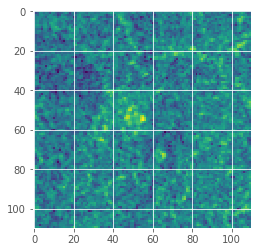

In [22]:
plt.imshow(example_image, resample=True)

In [23]:
# Let's take a look at examples of each image type, randomly.
class_name_index_dict = {0: 'Not Volcano', 1: 'Volcano'}
type_name_index_dict = {1: 'Definitely', 2: 'Probably', 3: 'Possibly', 4: 'Only pit visible'}

In [24]:
num_classes = 2
num_types = 4

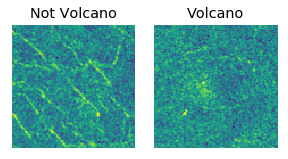

In [25]:
fig = plt.figure(figsize=(10,10))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = train_labels.loc[(train_labels['Volcano?'] == i)].index.values
    features = train_images.loc[idx]
    img_num = np.random.choice(idx)
    im = features.loc[img_num]
    ax.set_title(class_name_index_dict[i])
    plt.imshow(np.reshape(im.values, (110,110)))
plt.tight_layout()
plt.show()

In [26]:
# Make sure that the images labeled not volcano have type all missing
train_labels['Type'].loc[(train_labels['Volcano?'] == 0)].unique()

array([nan])

In [27]:
# Yep.  And we'll look at this for test also when we load it.

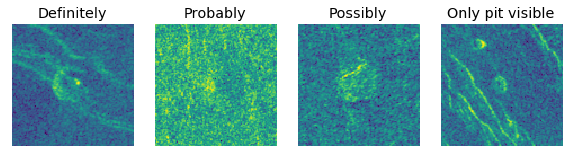

In [28]:
# Now let's look at some examples of the volcano types
fig = plt.figure(figsize=(10,10))
for i in range(num_types):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = train_labels.loc[((train_labels['Volcano?'] == 1) & (train_labels['Type'] == i+1))].index.values
    features = train_images.loc[idx]
    img_num = np.random.choice(idx)
    im = features.loc[img_num]
    ax.set_title(type_name_index_dict[i+1])
    plt.imshow(np.reshape(im.values, (110,110)))
plt.tight_layout()
plt.show()

In [29]:
# Right, so not entirely obvious from looking at these...

In [30]:
# So there are a some images with missing regions, indicated by zeros.  We'll ignore these for now.
# We also need to figure out what we are going to use as labels.  Do we want to predict volcano vs not volcano, or volcano types?
# There isn't a lot of data for some of the types. 

In [31]:
# Let's look at some more descriptive statistics for the types in the training and test sets.
# I want to be able to look at the distributions within the training and testing sets at the same time, so make a new labeled dataset
train_dist_df = train_labels.copy()
test_dist_df = test_labels.copy()

In [32]:
train_dist_df['source'] = 'train'
test_dist_df['source'] = 'test'

In [33]:
all_labels_df = pd.concat([train_dist_df, test_dist_df])

In [34]:
all_labels_df.head()

,Volcano?,Type,Radius,Number Volcanoes,source
0,1,3.0,17.46,1.0,train
1,0,NaN,NaN,NaN,train
2,0,NaN,NaN,NaN,train
3,0,NaN,NaN,NaN,train
4,0,NaN,NaN,NaN,train


In [35]:
all_labels_df.shape

(9734, 5)

In [36]:
train_labels.shape[0] + test_labels.shape[0]

9734

[Text(0,0,'Not volcano'), Text(0,0,'Volcano')]

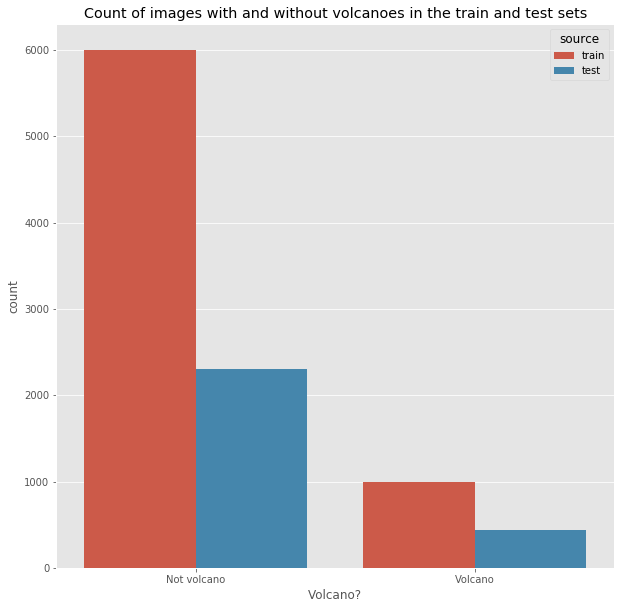

In [37]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df, x='Volcano?', hue='source', ax=ax)
ax.set_title('Count of images with and without volcanoes in the train and test sets')
ax.set_xticklabels(['Not volcano', 'Volcano'])

[Text(0,0,'Definitely'),
 Text(0,0,'Probably'),
 Text(0,0,'Possibly'),
 Text(0,0,'Only pit visible')]

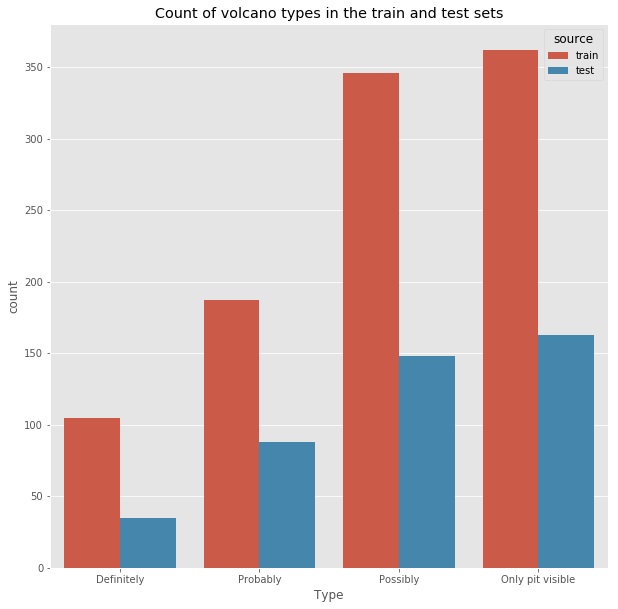

In [38]:
# So the relative percentage of volcanoes and not volcanoes is roughly the same between the train and test sets.
# Let's look at the type of volcanoes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df.loc[(all_labels_df['Volcano?'] == 1)], x='Type', hue='source', ax=ax)
ax.set_title('Count of volcano types in the train and test sets')
ax.set_xticklabels(['Definitely', 'Probably', 'Possibly', 'Only pit visible'])

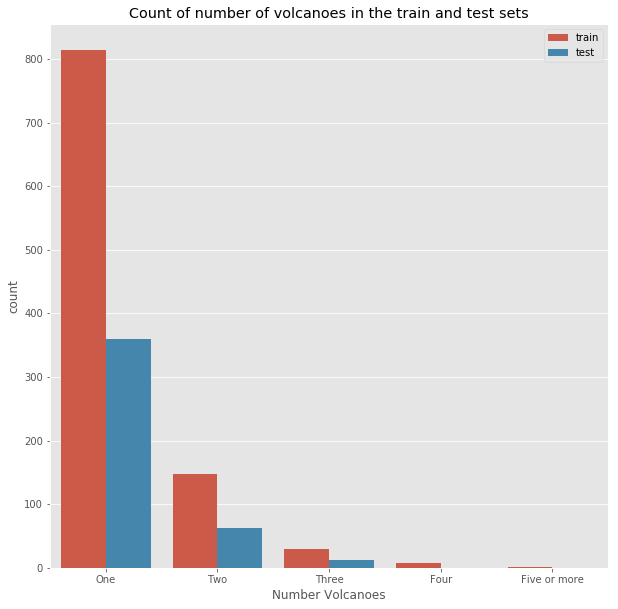

In [39]:
# Ok now let's look at the number of volcanoes in the images.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df.loc[(all_labels_df['Volcano?'] == 1)], x='Number Volcanoes', hue='source', ax=ax)
ax.set_title('Count of number of volcanoes in the train and test sets')
ax.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five or more'])
ax.legend(loc=1)

In [40]:
test_labels['Number Volcanoes'].value_counts()

1.0    359
2.0     63
3.0     12
Name: Number Volcanoes, dtype: int64

In [41]:
# So there are none of the 4 or the 5 or more category in the test set.
train_labels['Number Volcanoes'].value_counts()

1.0    814
2.0    147
3.0     30
4.0      7
5.0      2
Name: Number Volcanoes, dtype: int64

/Users/danielokeeffe/miniconda2/envs/basic_ml/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


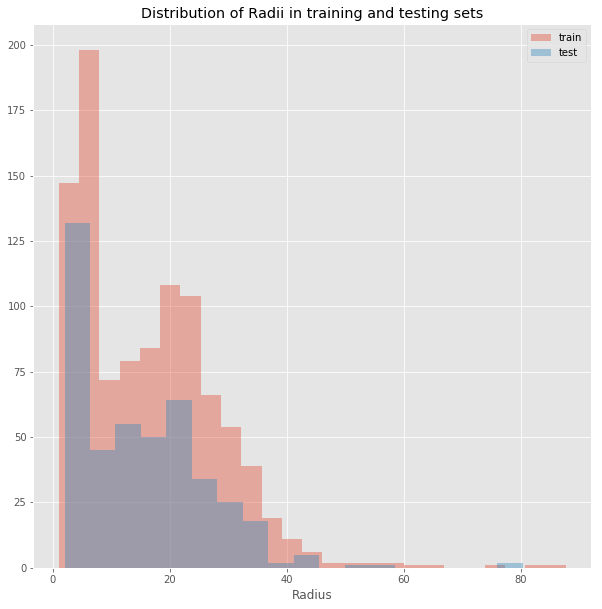

In [42]:
# Now let's look at the radii
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(all_labels_df['Radius'].loc[((all_labels_df['Volcano?'] == 1) & (all_labels_df['source'] == 'train'))], kde=False, label='train')
sns.distplot(all_labels_df['Radius'].loc[((all_labels_df['Volcano?'] == 1) & (all_labels_df['source'] == 'test'))], kde=False, label='test')
ax.set_title('Distribution of Radii in training and testing sets')
ax.legend(loc=1)

In [43]:
# Ok so there are some of the "bigger" raidus volcanoes in both training and testing sets.

In [44]:
# Quantify the number of images with missing regions.
# I know by inspection that image index 3 is corrupted in the training set.
train_images.iloc[3].head()

0    0
1    0
2    0
3    0
4    0
Name: 3, dtype: int64

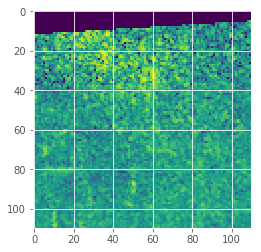

In [45]:
plt.imshow(np.reshape(train_images.iloc[3].values, (110, 110)), resample=True)

In [238]:
train_images_complete = train_images[~((train_images == 0).any(axis=1))]
test_images_complete = test_images[~((test_images == 0).any(axis=1))]

In [239]:
train_images_complete.shape

(6729, 12100)

In [240]:
test_images_complete.shape

(2627, 12100)

In [241]:
train_images.shape

(7000, 12100)

In [243]:
test_images.shape

(2734, 12100)

In [244]:
# So there are 271 images with missing pixels in the training set, and 107 images in the test set with missing pixels (missing here means at least one 0 value. Is this too strict?)

In [247]:
# How many have more than one missing pixel?
# First verify that there are really no zeros in the train_images_complete and test_images_complete dataframes
(test_images_complete == 0).astype(int).sum(axis=1).max()

0

In [248]:
(train_images_complete == 0).astype(int).sum(axis=1).max()

0

In [251]:
(train_images[((train_images == 0).any(axis=1))] == 0).astype(int).sum(axis=1).sort_values(ascending=True)

3125        1
6549        2
5557       39
1413       42
5074       45
3955       65
5942      112
5682      112
3068      263
3486      263
6326      263
3206      269
2025      288
2340      288
6251      398
1895      400
6697      409
3722      447
4048      483
2305      522
5227      655
31        655
5869      819
3603      859
656       962
3417      962
3         962
3483     1137
4061     1137
2324     1167
        ...  
1847    12100
4659    12100
4935    12100
729     12100
720     12100
660     12100
5158    12100
5165    12100
5188    12100
4963    12100
4623    12100
4619    12100
4573    12100
1271    12100
1252    12100
1953    12100
4108    12100
4186    12100
4207    12100
4218    12100
4288    12100
4320    12100
1163    12100
4477    12100
1011    12100
952     12100
4528    12100
2461    12100
5244    12100
3622    12100
Length: 271, dtype: int64

In [253]:
(test_images[((test_images == 0).any(axis=1))] == 0).astype(int).sum(axis=1).sort_values(ascending=True)

2105      263
317       288
1460      295
918       655
123      1167
366      1343
850      1522
1412     1707
1355     2394
2673     2465
1005     2475
1186     2524
1734     2565
1540     2747
2318     2834
1366     3121
1962     3321
1045     3653
1665     3726
1667     4662
511      5038
1751     5038
907      5038
762      5732
1434     5921
1167     6316
318      6316
2014     6331
349      6659
2404     6740
        ...  
508     12100
873     12100
412     12100
378     12100
360     12100
290     12100
267     12100
122     12100
48      12100
392     12100
988     12100
989     12100
1044    12100
1599    12100
1594    12100
1592    12100
1584    12100
1571    12100
1562    12100
1517    12100
1512    12100
1503    12100
1395    12100
1338    12100
1210    12100
1154    12100
1124    12100
1093    12100
1670    12100
2730    12100
Length: 107, dtype: int64

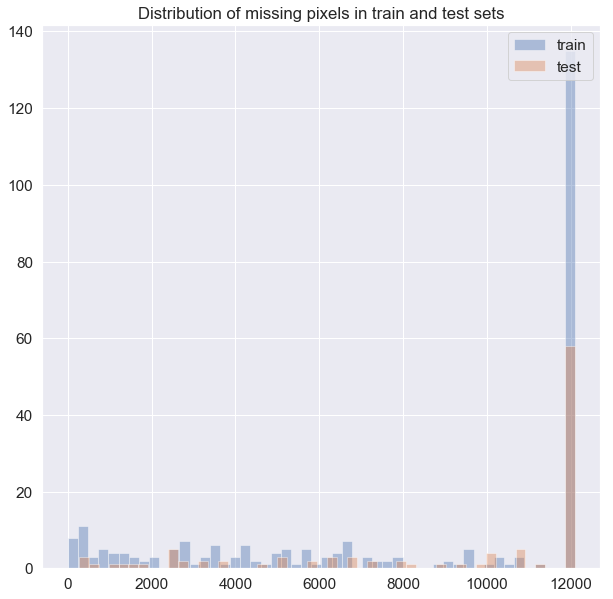

In [256]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.distplot((train_images[((train_images == 0).any(axis=1))] == 0).astype(int).sum(axis=1), kde=False, label='train', bins=50)
sns.distplot((test_images[((test_images == 0).any(axis=1))] == 0).astype(int).sum(axis=1), kde=False, label='test', bins=50)
ax.set_title('Distribution of missing pixels in train and test sets')
ax.legend(loc=1)

In [257]:
# so the majority of cases have many missing pixels, although some are only a few.  In particular, in the train set, there are some that only have one or two missing pixels.
# We'll drop them all for now and try adjusting this threshold in the future.

In [258]:
# Get the labels from the non-missing values.
train_images_complete.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,115,96,89,102,109,108,102,104,95,91,100,99,97,100,107,109,98,98,94,98,102,87,82,94,105,93,102,107,98,105,111,108,94,95,97,108,96,92,89,95,101,94,56,61,90,101,92,101,110,102,104,116,112,95,95,90,110,109,90,97,101,101,92,79,77,96,89,91,97,101,98,89,95,107,113,99,78,93,102,99,98,105,103,107,112,94,79,84,103,104,103,103,114,125,111,95,99,87,90,93,77,75,84,104,100,90,99,93,79,101,99,86,76,80,87,98,108,95,72,91,98,82,97,104,102,99,91,86,101,99,97,91,95,93,103,104,104,96,106,112,108,106,105,107,112,109,100,96,90,99,109,102,87,96,99,108,103,84,98,96,79,87,98,100,103,96,102,102,98,100,112,100,91,100,109,95,105,103,116,124,116,105,97,109,123,115,84,104,102,100,87,95,92,87,100,86,80,90,92,95,103,101,104,104,109,118,108,91,79,84,95,94,89,102,106,99,92,94,106,101,89,90,70,78,103,95,89,80,82,86,97,95,105,112,97,95,100,94,103,92,...,99,96,110,115,102,92,83,73,94,112,109,92,100,96,96,84,111,116,109,87,98,111,103,98,111,112,110,94,92,90,81,94,91,66,88,94,91,86,87,95,99,101,92,103,101,102,96,91,92,90,108,108,104,116,106,95,104,110,106,105,106,105,111,107,101,94,106,109,102,103,96,93,99,93,76,94,101,95,84,98,97,70,79,79,89,99,101,95,100,89,88,88,96,89,92,109,113,98,96,97,101,104,106,95,80,89,93,90,83,92,93,101,115,124,119,108,84,91,95,104,108,100,103,90,98,101,103,116,125,117,101,96,88,99,102,94,99,102,82,91,98,106,110,101,94,92,91,76,90,98,81,91,89,98,102,107,103,99,98,109,129,112,100,101,103,103,103,107,110,110,116,125,123,111,83,88,98,93,76,96,104,93,106,108,104,99,84,80,77,95,93,76,95,111,99,94,95,97,100,101,102,110,101,104,101,113,108,77,82,97,101,95,105,103

In [259]:
test_images_complete.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,118,115,111,121,114,94,98,100,99,108,112,107,100,88,98,104,107,105,96,94,83,94,97,95,90,96,100,110,109,99,96,107,103,104,106,100,94,97,105,105,97,104,120,122,120,109,103,110,119,113,93,92,104,108,106,113,114,101,97,104,106,114,112,106,98,97,86,89,99,104,91,89,100,109,106,96,108,111,107,117,130,126,111,106,116,124,130,126,113,109,110,113,106,95,104,107,115,108,96,104,101,106,108,111,105,99,103,96,93,97,96,99,107,117,105,84,107,110,98,106,110,98,95,103,113,123,120,111,104,104,99,104,108,99,96,103,96,92,94,107,113,111,106,112,113,108,103,98,97,101,101,105,106,113,118,112,114,120,127,122,110,104,101,97,99,111,117,112,103,108,110,106,109,108,110,116,105,97,89,90,98,106,101,100,104,107,107,100,103,109,118,113,104,107,111,128,134,127,114,116,120,121,110,108,101,96,104,98,89,93,112,111,115,110,99,98,100,103,112,112,101,105,110,104,82,94,111,112,103,98,106,101,94,98,104,110,112,108,105,101,...,101,92,105,107,108,100,101,107,86,94,98,101,94,105,116,108,98,107,106,95,104,115,112,96,89,103,103,105,116,117,99,106,105,104,96,93,105,105,107,109,104,86,98,107,112,112,101,96,111,108,97,97,106,103,99,100,109,105,96,110,116,104,95,101,103,108,104,107,111,106,99,107,117,122,120,108,109,106,99,99,108,108,98,91,97,104,100,97,107,114,117,109,108,110,108,107,113,115,107,105,108,94,101,105,107,106,109,114,116,115,106,96,98,93,98,103,100,97,97,103,100,100,106,117,124,113,92,95,107,111,109,110,110,94,82,95,97,111,126,133,99,111,117,115,110,106,101,104,109,114,115,110,114,107,97,101,84,93,110,119,121,111,105,104,103,104,109,109,98,97,111,105,106,112,100,103,99,100,

In [260]:
# So I need to get the labels with indices within the appropriate sets.
train_labels_complete = train_labels[train_labels.index.isin(train_images_complete.index.tolist())]

In [261]:
test_labels_complete = test_labels[test_labels.index.isin(test_images_complete.index.tolist())]

In [262]:
train_labels_complete.shape

(6729, 4)

In [263]:
test_labels_complete.shape

(2627, 4)

## Classifier
* We'll try a convolutional neural net here to classify the volcanoes
* We'll first try just volcano vs not volcano
* We'll then try out the different levels of confidence in the type
* Of course, this means that our ground truth is a bit sketchy, so we'll have to take performance with a grain of salt
* There is also an issue with images that have missing areas.  We'll try to first build a model with these errors included, and then see what the effect of removing them is.

In [46]:
def plot_model(model):
    return SVG(keras.utils.vis_utils.model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [205]:
def history_plot(history, validation=True, figsize_=(20,10), use_epochs_for_x_ticks=True):
    """Plot network metric history for traning and validation sets"""
    df = pd.DataFrame(history.history)
    num_epochs = df.shape[0]
    
    # Set figure size option
    # plt.rcParams['figure.figsize'] = figsize_
    # Why do I need to reset this everytime?
    # plt.style.use('dark_background')
    plt.figure(figsize=figsize_)
    metrics_ = [x for x in df.columns.tolist() if 'val' not in x]
    num_metrics = len(metrics_)
    
    for i in range(0, num_metrics):
        plt.subplot(int(round(num_metrics/2)), 2, i+1)
        plt.plot(df[metrics_[i]].values, 'r')
        if validation:
            validation_metric = 'val_' + metrics_[i]
            plt.plot(df[validation_metric].values, 'g')
        if use_epochs_for_x_ticks:
            plt.xticks(np.arange(0, num_epochs+1, 1.0))
        plt.xlabel("Num of Epochs")
        plt.ylabel(metrics_[i])
        plt.title("Training {0} vs Validation {1}".format(metrics_[i], metrics_[i]))
        plt.legend(['train','validation'])
    plt.tight_layout()
    plt.show()

In [48]:
def make_confusion_matrix(classifier_, x_test, y_test, figsize_=(20,10)):
    """Make a confusion matrix"""
    Y_pred = classifier_.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    
    # Compute the confusion matrix and store as a DataFrame
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)
    
    plt.figure(figsize=figsize_)
    # Set label font size
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='.1f')

In [49]:
def make_score_distribution(df, proba_cols, true_col, true_label, title=None, figsize=(10, 10)):
    """
    Makes a score distribution for examining the performance of a classifier.
    :param df: Dataframe containing the true labels, and predicted probabilities for each class
    :param proba_cols: A list of the column names in df which have the predicted probabilities
    :param true_col: A string which is the column name in df of the true labels
    :param true_label: The actual value of the true label (i.e. 1, 2, etc..)
    :param title: String, the title of plot.  Default is None.
    :param figsize: Optional: a tuple of integers for the figure size.
    :return: Nothing
    """
    # TODO: Test this for multi-class problems.
    fig, ax = plt.subplots(figsize=figsize)
    sns.distplot(df[proba_cols[0]].loc[(df[true_col] == true_label)], kde=False, ax=ax)
    if title:
        sns.distplot(df[proba_cols[1]].loc[(df[true_col] == true_label)], kde=False, ax=ax).set_title(title)
    else:
        sns.distplot(df[proba_cols[1]].loc[(df[true_col] == true_label)], kde=False, ax=ax)
    ax.set(xlabel='score', ylabel='count')
    plt.show()

In [50]:
def make_roc_curves_df(df, true_col, scores_col, figsize=(10, 10)):
    """
    Function for making nice-ish looking roc curves. Take a dataframe as in input instead of arrays.
    :param df: Dataframe with true labels and predicted scores
    :param true_col: String. Column name in the dataframe of the true labels
    :param scores_col: String. Column name in the dataframe of the predicted scores
    :param figsize: Optional: a tuple of intergers for the figure size
    :return: false positive rate, true positive rate, the corresponding threshold, and the auc score
    """
    fpr, tpr, threshold = roc_curve(y_true=df[true_col].values, y_score=df[scores_col].values)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=figsize)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return fpr, tpr, threshold, roc_auc

In [51]:
conv = functools.partial(keras.layers.Conv2D, filters=50, kernel_size=3, strides=2, activation="relu", padding="same")

In [52]:
# We need to prep the image data.  We'll want to scale values to be between -1 and 1.
x_train = train_images.values
x_test = test_images.values

In [53]:
y_train = train_labels['Volcano?'].values
y_test = test_labels['Volcano?'].values

In [54]:
# The other values in the labels set look like target leaks, so we'll leave them out for now.
x_train = (2/(x_train.max()))*x_train - 1
x_test = (2/(x_test.max()))*x_test - 1

In [55]:
print('training set pixel values scaled to {0} and {1}').format(np.min(x_train), np.max(x_train))
print('\n')
print('testing set pixel values scaled to {0} and {1}').format(np.min(x_test), np.max(x_test))

training set pixel values scaled to -1.0 and 1.0


testing set pixel values scaled to -1.0 and 1.0


In [56]:
# We need to reshape the image values.
x_train.shape[1:]

(12100,)

In [57]:
x_train = [np.reshape(x, (110, 110, 1)) for x in x_train]

In [58]:
x_test = [np.reshape(x, (110, 110, 1)) for x in x_test]

In [59]:
x_train = np.array(x_train)

In [60]:
x_test = np.array(x_test)

In [61]:
x_train[0].shape

(110, 110, 1)

In [62]:
x_test[0].shape

(110, 110, 1)

In [63]:
# We need a validation set.
x_for_train = x_train[0:6000]
y_for_train = y_train[0:6000]
x_for_valid = x_train[6000::]
y_for_valid = y_train[6000::]

In [64]:
x_for_train.shape

(6000, 110, 110, 1)

In [65]:
x_for_valid.shape

(1000, 110, 110, 1)

In [175]:
# We'll use a simple sequential model
classifier_cnn = keras.Sequential()

In [176]:
# ok so this is the input dimensions.
classifier_cnn.add(keras.layers.InputLayer(input_shape=x_train.shape[1:]))

In [177]:
# add convolutional layers
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.Dropout(rate=0.1))

In [178]:
# Add a layer to flatten 
classifier_cnn.add(keras.layers.Flatten())

In [179]:
# Add a dense layer for the output with softmax activation
classifier_cnn.add(keras.layers.Dense(num_classes, activation="softmax"))

In [180]:
classifier_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 55, 55, 50)        500       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 50)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 27, 27, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 50)          22550     
__________

In [181]:
# We can visualize the network architecture
sequential_model_to_ascii_printout(classifier_cnn)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    110  110    1
              Conv2D    \|/  -------------------       500     1.0%
                relu   #####     55   55   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     27   27   50
             Dropout    | || -------------------         0     0.0%
                       #####     27   27   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####     14   14   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   50
             Dropout    | || -------------------         0     0.0%
                       #####      7    7   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####      4    4   50
             Dropout    | || -------------------         0     0.0%
              

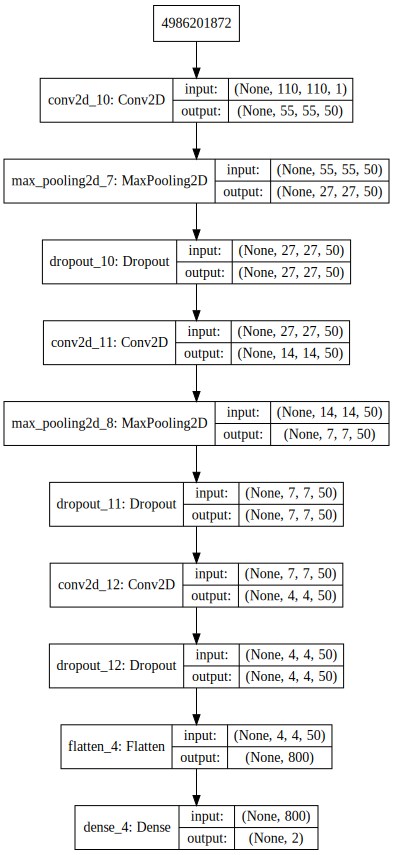

In [182]:
# Here's a nicer plot
plot_model(classifier_cnn)

In [183]:
# If we hot encode the target, we could use categorial_crossentropy
classifier_cnn.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6), loss="sparse_categorical_crossentropy", metrics=['acc'])
# classifier_cnn.compile(optimizer=keras.optimizers.Adam(lr=0.0005), loss="sparse_categorical_crossentropy", metrics=['acc'])

In [184]:
# Before fitting, define the history object for the callbacks.
history_cnn = History()

In [185]:
# Fit the model.
classifier_cnn.fit(x=x_for_train, y=y_for_train, validation_data=(x_for_valid, y_for_valid), epochs=100, callbacks=[history_cnn])

Train on 6000 samples, validate on 1000 samples
Epoch 1/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.4365 - acc: 0.8517 - val_loss: 0.4195 - val_acc: 0.8490
Epoch 2/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3861 - acc: 0.8585 - val_loss: 0.3970 - val_acc: 0.8490
Epoch 3/100
6000/6000 [==============================] - 13s 2ms/step - loss: 0.3481 - acc: 0.8617 - val_loss: 0.3413 - val_acc: 0.8710
Epoch 4/100
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2904 - acc: 0.8890 - val_loss: 0.2950 - val_acc: 0.8980
Epoch 5/100
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2549 - acc: 0.9065 - val_loss: 0.2643 - val_acc: 0.9020
Epoch 6/100
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2358 - acc: 0.9142 - val_loss: 0.2469 - val_acc: 0.9090
Epoch 7/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2197 - acc: 0.9187 - val_loss: 0.2273 - val_acc: 0.9180


In [186]:
score_cnn = classifier_cnn.evaluate(x_test, y_test, verbose=0)

In [187]:
print('Test loss: {0}'.format(score_cnn[0]))

Test loss: 0.118739402501


In [188]:
print('Test accuracy: {0}'.format(score_cnn[1]))

Test accuracy: 0.967446964024


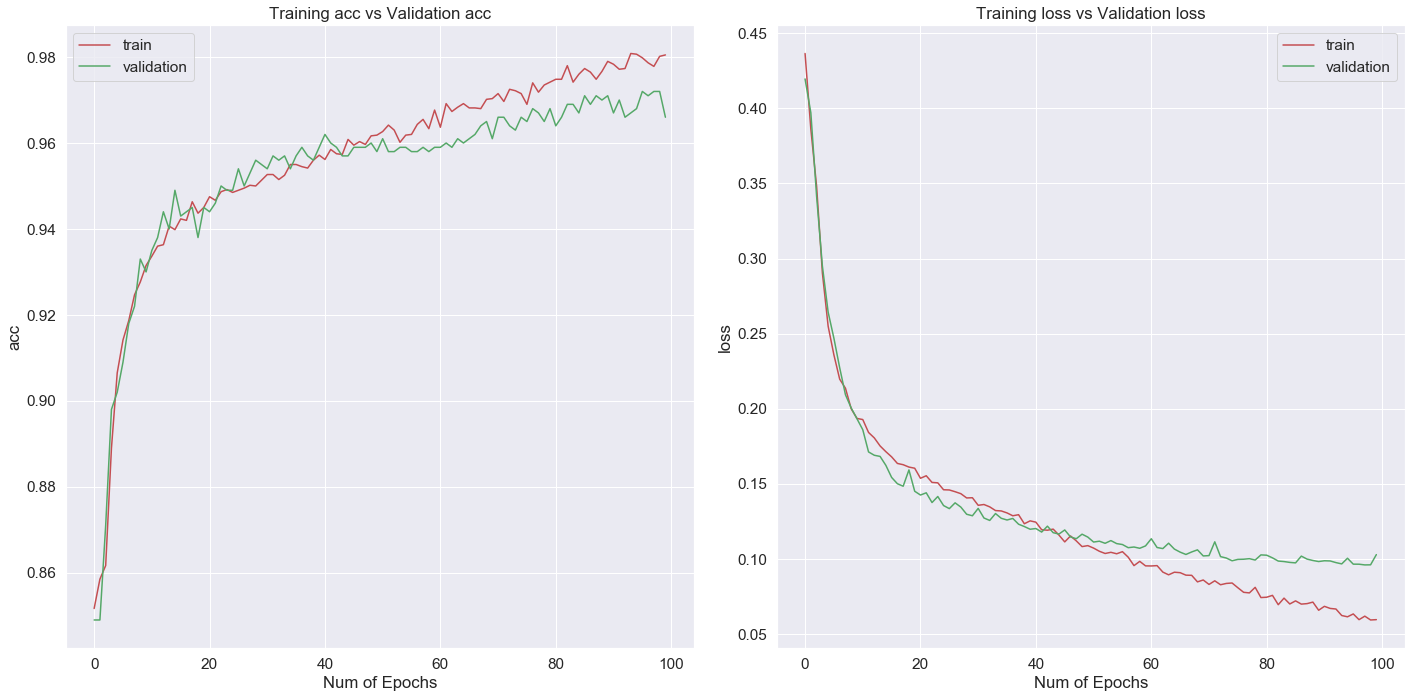

In [207]:
history_plot(history=history_cnn, validation=True, figsize_=(20,10), use_epochs_for_x_ticks=False)

In [190]:
cols_proba = ['probability_no_volcano', 'probability_volcano']

In [191]:
df1 = pd.DataFrame(classifier_cnn.predict_proba(x_test), columns=cols_proba)

In [192]:
pred_df = test_labels.copy()

In [193]:
pred_df = pd.concat([pred_df, df1], axis=1)

In [194]:
# test_labels.drop(['probability_no_volcano', 'probability_volcano', 'predicted_class_50_threshold'], axis=1, inplace=True)

In [195]:
pred_df.head()

,Volcano?,Type,Radius,Number Volcanoes,probability_no_volcano,probability_volcano
0,0,NaN,NaN,NaN,0.980242,0.019758
1,0,NaN,NaN,NaN,0.998986,0.001014
2,1,1.0,17.00,1.0,0.047742,0.952258
3,0,NaN,NaN,NaN,0.998540,0.001460
4,1,3.0,15.13,1.0,0.000034,0.999966


In [196]:
pred_df['predicted_class_50_threshold'] = classifier_cnn.predict_classes(x_test)

In [197]:
# Ok so how did we do? We want an roc curve, want to understand precision and recall here as well.
from sklearn.metrics import auc, roc_curve

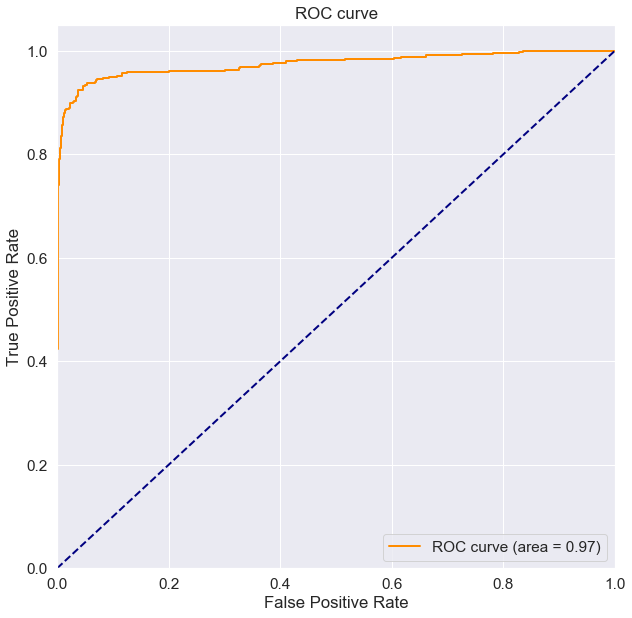

In [198]:
fpr, tpr, threshold, roc_auc = make_roc_curves_df(df=pred_df, true_col='Volcano?', scores_col='probability_volcano', figsize=(10, 10))

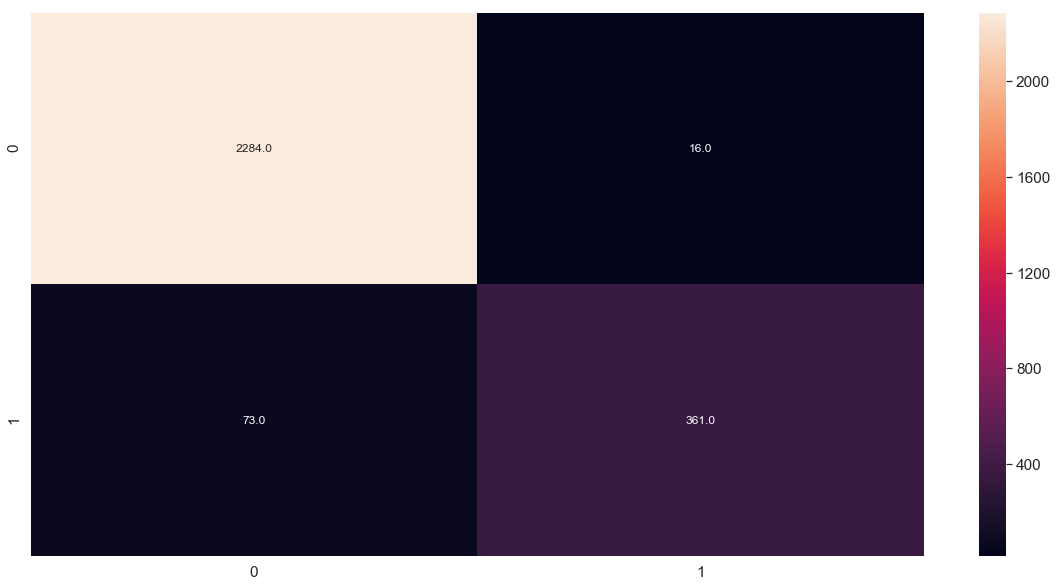

In [199]:
make_confusion_matrix(classifier_=classifier_cnn, x_test=x_test, y_test=y_test)

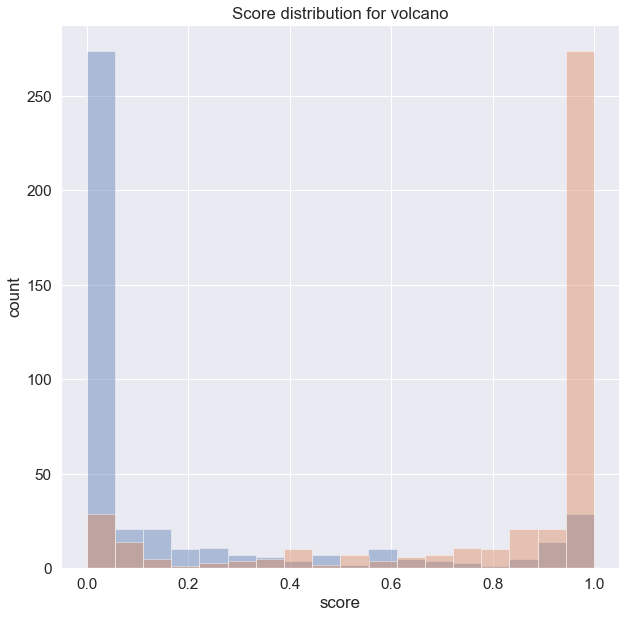

In [200]:
# Hmm...ok so that's interesting.  There are a lot of volcanos that we are predicting as not volcano.  
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=1, 
                        title='Score distribution for volcano')

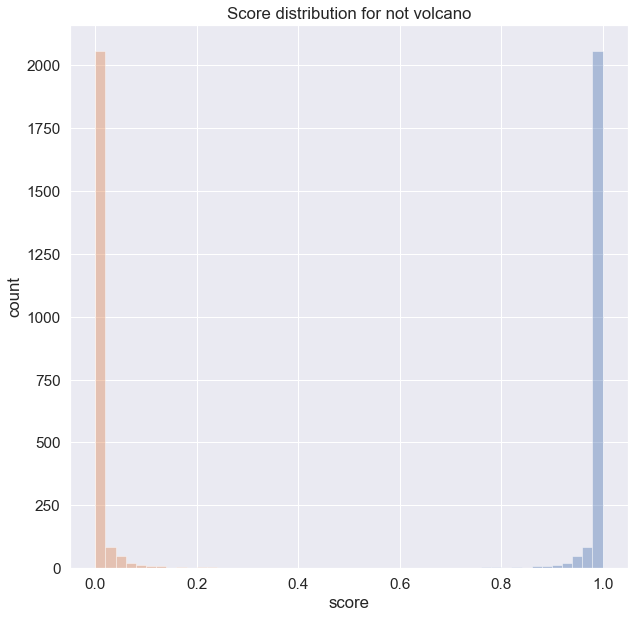

In [201]:
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=0, 
                        title='Score distribution for not volcano')

In [202]:
# Much better.  What are the mislabeled precentages on the test set?
pred_df.head()

,Volcano?,Type,Radius,Number Volcanoes,probability_no_volcano,probability_volcano,predicted_class_50_threshold
0,0,NaN,NaN,NaN,0.980242,0.019758,0
1,0,NaN,NaN,NaN,0.998986,0.001014,0
2,1,1.0,17.00,1.0,0.047742,0.952258,1
3,0,NaN,NaN,NaN,0.998540,0.001460,0
4,1,3.0,15.13,1.0,0.000034,0.999966,1


In [203]:
percent_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 1) & (pred_df['Volcano?'] == 1))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 1)].shape[0])*100
percent_not_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 0) & (pred_df['Volcano?'] == 0))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 0)].shape[0])*100

In [204]:
print('Percentage of volcanoes correctly predicted: {0}'.format(percent_vol))
print('\n')
print('Percentage of not volcanoes correctly predicted: {0}'.format(percent_not_vol))

Percentage of volcanoes correctly predicted: 83.1797235023


Percentage of not volcanoes correctly predicted: 99.3043478261


## Model with observations with missing pixels removed
* We've removed every observation in the dataset where at least one pixel is missing.  We'll see how this does and maybe re-evaluate this strategy.

In [268]:
# We need to prep the image data.  We'll want to scale values to be between -1 and 1.
x_train = train_images_complete.values
x_test = test_images_complete.values

In [269]:
y_train = train_labels_complete['Volcano?'].values
y_test = test_labels_complete['Volcano?'].values

In [270]:
# The other values in the labels set look like target leaks, so we'll leave them out for now.
x_train = (2/(x_train.max() - x_train.min()))*(x_train - x_train.min()) - 1
x_test = (2/(x_test.max() - x_test.min()))*(x_test - x_test.min()) - 1

In [271]:
print('training set pixel values scaled to {0} and {1}').format(np.min(x_train), np.max(x_train))
print('\n')
print('testing set pixel values scaled to {0} and {1}').format(np.min(x_test), np.max(x_test))

training set pixel values scaled to -1.0 and 1.0


testing set pixel values scaled to -1.0 and 1.0


In [272]:
# We need to reshape the image values.
x_train.shape[1:]

(12100,)

In [273]:
x_train = [np.reshape(x, (110, 110, 1)) for x in x_train]

In [274]:
x_test = [np.reshape(x, (110, 110, 1)) for x in x_test]

In [275]:
x_train = np.array(x_train)

In [276]:
x_test = np.array(x_test)

In [277]:
x_train[0].shape

(110, 110, 1)

In [278]:
x_test[0].shape

(110, 110, 1)

In [280]:
# We need a validation set. We'll use the same number of training samples as the previous model. Of course, this will mean a somewhat smaller validation set. 
x_for_train = x_train[0:6000]
y_for_train = y_train[0:6000]
x_for_valid = x_train[6000::]
y_for_valid = y_train[6000::]

In [281]:
x_for_train.shape

(6000, 110, 110, 1)

In [282]:
x_for_valid.shape

(729, 110, 110, 1)

In [283]:
y_for_train.shape

(6000,)

In [284]:
y_for_valid.shape

(729,)

In [285]:
# We'll use a simple sequential model
classifier_cnn = keras.Sequential()

In [286]:
# ok so this is the input dimensions.
classifier_cnn.add(keras.layers.InputLayer(input_shape=x_train.shape[1:]))

In [287]:
# add convolutional layers
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.Dropout(rate=0.1))

In [288]:
# Add a layer to flatten 
classifier_cnn.add(keras.layers.Flatten())

In [289]:
# Add a dense layer for the output with softmax activation
classifier_cnn.add(keras.layers.Dense(num_classes, activation="softmax"))

In [290]:
classifier_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 55, 55, 50)        500       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 50)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 27, 27, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 50)          22550     
__________

In [291]:
# We can visualize the network architecture
sequential_model_to_ascii_printout(classifier_cnn)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    110  110    1
              Conv2D    \|/  -------------------       500     1.0%
                relu   #####     55   55   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     27   27   50
             Dropout    | || -------------------         0     0.0%
                       #####     27   27   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####     14   14   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   50
             Dropout    | || -------------------         0     0.0%
                       #####      7    7   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####      4    4   50
             Dropout    | || -------------------         0     0.0%
              

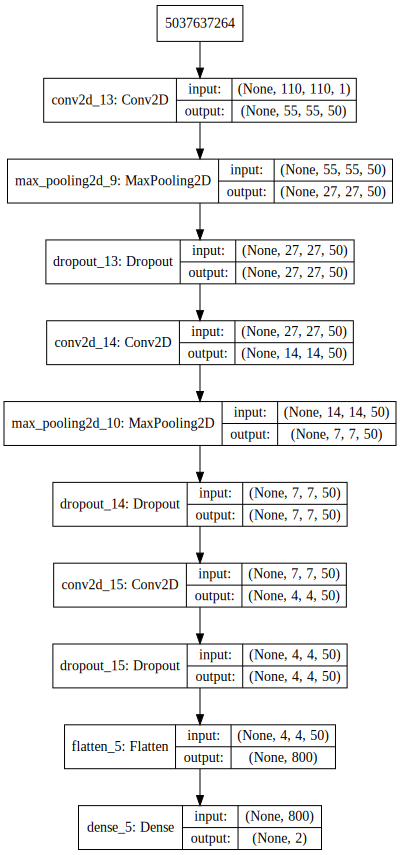

In [292]:
# Here's a nicer plot
plot_model(classifier_cnn)

In [293]:
# Compile the model
classifier_cnn.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6), loss="sparse_categorical_crossentropy", metrics=['acc'])

In [294]:
# Before fitting, define the history object for the callbacks.
history_cnn = History()

In [295]:
# Fit the model.
classifier_cnn.fit(x=x_for_train, y=y_for_train, validation_data=(x_for_valid, y_for_valid), epochs=100, callbacks=[history_cnn])

Train on 6000 samples, validate on 729 samples
Epoch 1/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.4551 - acc: 0.8463 - val_loss: 0.4388 - val_acc: 0.8422
Epoch 2/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.4082 - acc: 0.8555 - val_loss: 0.4278 - val_acc: 0.8422
Epoch 3/100
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3947 - acc: 0.8555 - val_loss: 0.4072 - val_acc: 0.8422
Epoch 4/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3647 - acc: 0.8567 - val_loss: 0.3633 - val_acc: 0.8505
Epoch 5/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3154 - acc: 0.8740 - val_loss: 0.3094 - val_acc: 0.8834
Epoch 6/100
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2739 - acc: 0.8998 - val_loss: 0.2736 - val_acc: 0.8916
Epoch 7/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2532 - acc: 0.9098 - val_loss: 0.2485 - val_acc: 0.9053
E

In [296]:
score_cnn = classifier_cnn.evaluate(x_test, y_test, verbose=0)

In [297]:
print('Test loss: {0}'.format(score_cnn[0]))

Test loss: 0.112232239896


In [298]:
print('Test accuracy: {0}'.format(score_cnn[1]))

Test accuracy: 0.967643700038


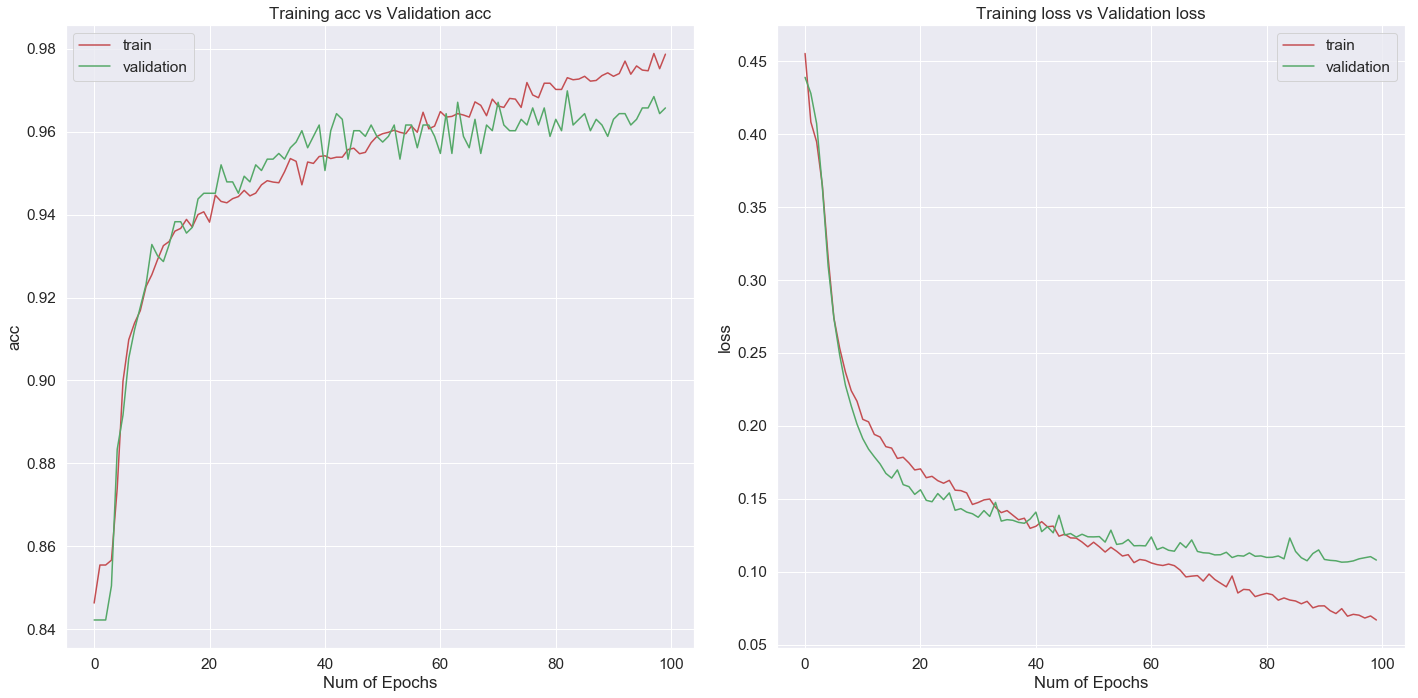

In [299]:
history_plot(history=history_cnn, validation=True, figsize_=(20,10), use_epochs_for_x_ticks=False)

In [300]:
cols_proba = ['probability_no_volcano', 'probability_volcano']

In [349]:
df1 = pd.DataFrame(classifier_cnn.predict_proba(x_test), columns=cols_proba)

In [350]:
pred_df = test_labels_complete.copy()

In [355]:
pred_df = pd.concat([pred_df.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [358]:
pred_df['predicted_class_50_threshold'] = classifier_cnn.predict_classes(x_test)

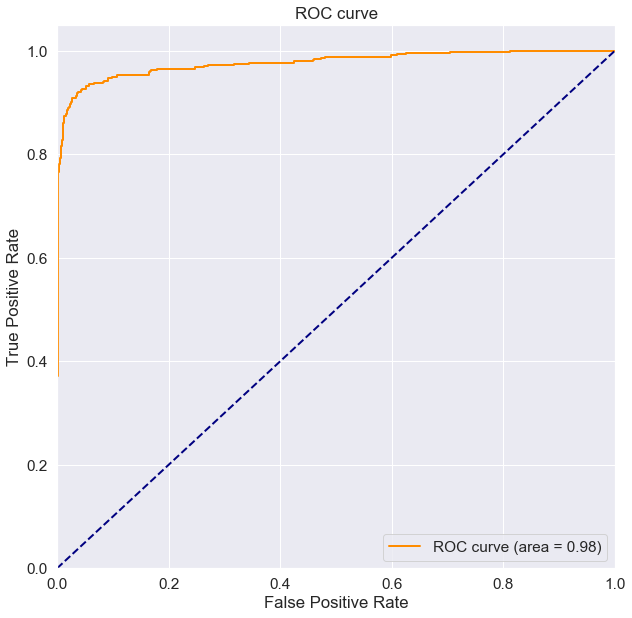

In [359]:
fpr, tpr, threshold, roc_auc = make_roc_curves_df(df=pred_df, true_col='Volcano?', scores_col='probability_volcano', figsize=(10, 10))

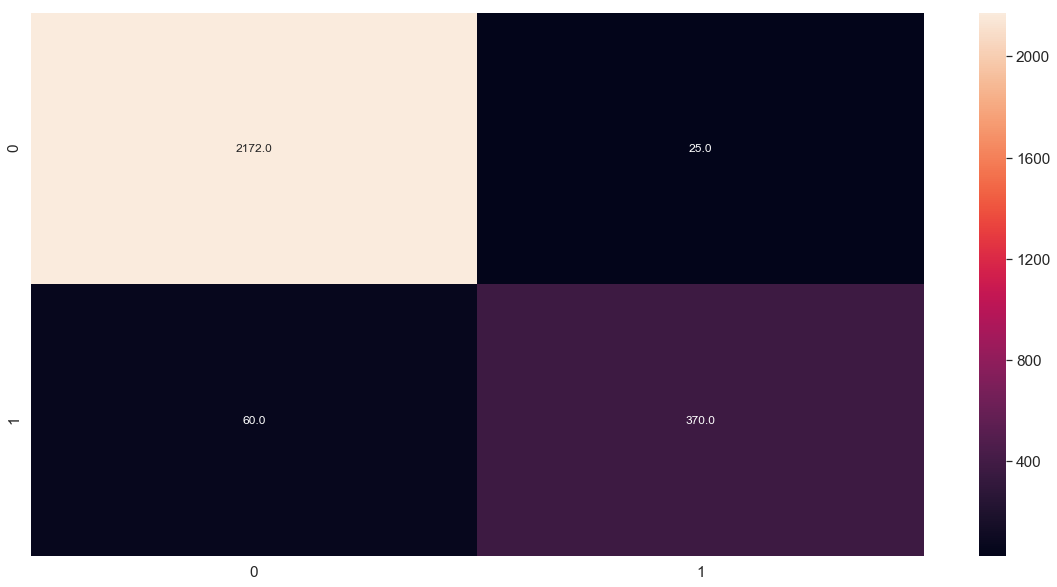

In [360]:
make_confusion_matrix(classifier_=classifier_cnn, x_test=x_test, y_test=y_test)

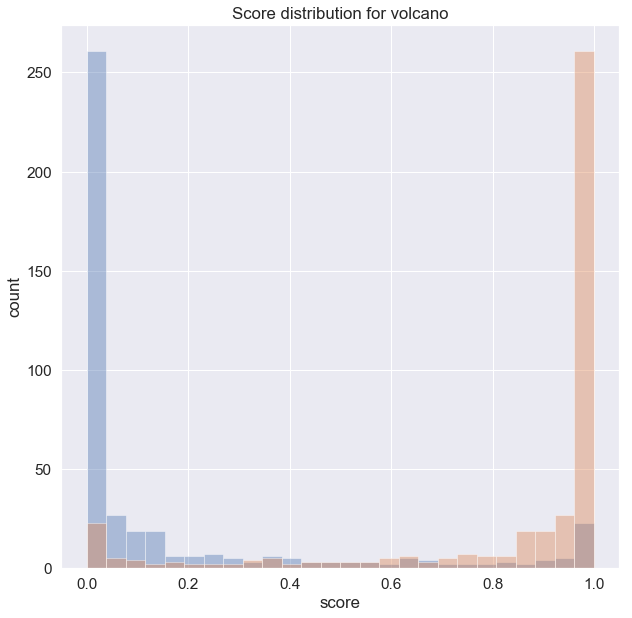

In [361]:
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=1, 
                        title='Score distribution for volcano')

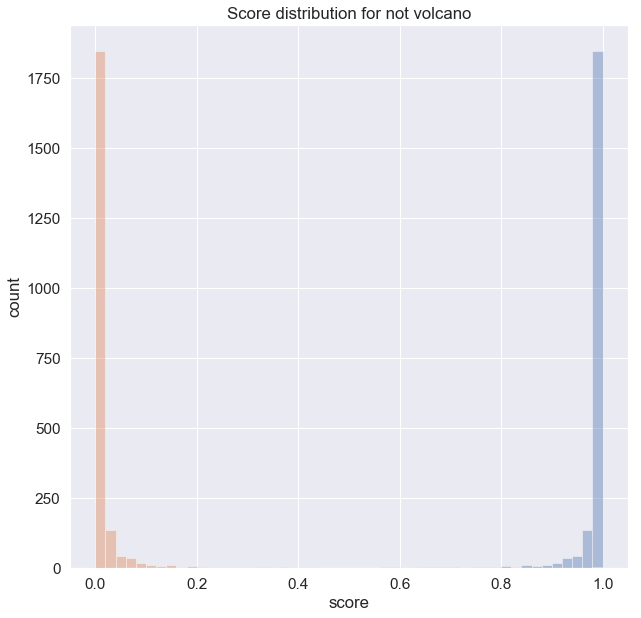

In [362]:
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=0, 
                        title='Score distribution for not volcano')

In [363]:
percent_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 1) & (pred_df['Volcano?'] == 1))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 1)].shape[0])*100
percent_not_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 0) & (pred_df['Volcano?'] == 0))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 0)].shape[0])*100

In [364]:
print('Percentage of volcanoes correctly predicted: {0}'.format(percent_vol))
print('\n')
print('Percentage of not volcanoes correctly predicted: {0}'.format(percent_not_vol))

Percentage of volcanoes correctly predicted: 86.0465116279


Percentage of not volcanoes correctly predicted: 98.8620846609
